## 1. Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Read data

In [2]:
df_raw = pd.read_csv('./datasets/ChargingRecords_Updated.csv')
df_trans = pd.read_csv('./datasets/ChargingRecords_Updated_transactions.csv')

Also, we need to convert all 'data' columns to datetime Pandas format:

In [3]:
print(df_raw.columns)
print(df_trans.columns)

Index(['UserID', 'ChargerID', 'ChargerCompany', 'Location', 'ChargerType',
       'StartDay', 'StartTime', 'EndDay', 'EndTime', 'StartDatetime',
       'EndDatetime', 'Duration', 'Demand', 'location_id', 'start_day',
       'start_time', 'end_day', 'end_time', 'EV_req'],
      dtype='object')
Index(['Started', 'ConnectedTime', 'TotalEnergy', 'ChargePoint'], dtype='object')


In [4]:
df_raw['start_day'] = pd.to_datetime(df_raw['start_day'], format = "%Y/%m/%d")
df_raw['end_day'] = pd.to_datetime(df_raw['end_day'], format = "%Y/%m/%d")
df_raw['start_time'] = pd.to_datetime(df_raw['start_time'], format = "%H:%M:%S").dt.time
df_raw['end_time'] = pd.to_datetime(df_raw['end_time'], format = "%H:%M:%S").dt.time
df_trans['Started'] = pd.to_datetime(df_trans['Started'], format = "%d/%m/%Y %H:%M:%S")


After that, we can look and check our different dataframes:

In [5]:
print(df_raw.head())
print(df_trans.head())

   UserID  ChargerID  ChargerCompany Location  ChargerType   StartDay  \
0       0          1               1    hotel            0  2022/9/15   
1       0          1               1    hotel            0  2022/9/14   
2       0          1               1    hotel            0  2022/9/14   
3       0          1               1    hotel            0  2022/9/29   
4       0          1               1    hotel            0  2022/9/25   

  StartTime     EndDay   EndTime    StartDatetime      EndDatetime  Duration  \
0  20:54:02  2022/9/15  23:59:13  2022/9/15 20:54  2022/9/15 23:59       185   
1  20:01:05  2022/9/14  21:31:04  2022/9/14 20:01  2022/9/14 21:31        90   
2  18:54:30  2022/9/14  19:54:29  2022/9/14 18:54  2022/9/14 19:54        60   
3  18:32:51  2022/9/30   0:16:42  2022/9/29 18:32   2022/9/30 0:16       344   
4  19:30:15  2022/9/26   0:30:14  2022/9/25 19:30   2022/9/26 0:30       300   

   Demand location_id  start_day start_time    end_day  end_time  EV_req  
0   2

In [6]:
df_raw['Location'].unique()

array(['hotel', 'company', 'apartment', 'resort', 'public area',
       'public institution', 'restaurant', 'accommodation', 'golf',
       'sightseeing', 'market', 'camping', 'public parking lot',
       'bus garage'], dtype=object)

## 3. Visualize data

One of the biggest parts of the notebook. Here we can look through some variables and see some dependencies. Firstly, let's check the dependency from the date:

In [7]:
def grouped(df, key, freq, col):
    """GROUP AND COUNT DATA WITH CERTAIN FREQUENCY"""
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean = (col, 'mean'), count = (col, 'count'))
    df_grouped = df_grouped.reset_index()
    return df_grouped


In [8]:
df_grouped_start_d = grouped(df_trans, 'Started', 'm', 'TotalEnergy')
df_grouped_start_d

/tmp/ipykernel_79592/2849400670.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean = (col, 'mean'), count = (col, 'count'))


,Started,mean,count
0,2021-09-30,30.483684,19
1,2021-10-31,16.522514,3930
2,2021-11-30,16.758129,4281
3,2021-12-31,17.529455,4858
4,2022-01-31,17.391593,6307
5,2022-02-28,17.696241,5853
6,2022-03-31,17.485474,5948
7,2022-04-30,17.384997,6006
8,2022-05-31,17.239948,6691
9,2022-06-30,17.471306,6729


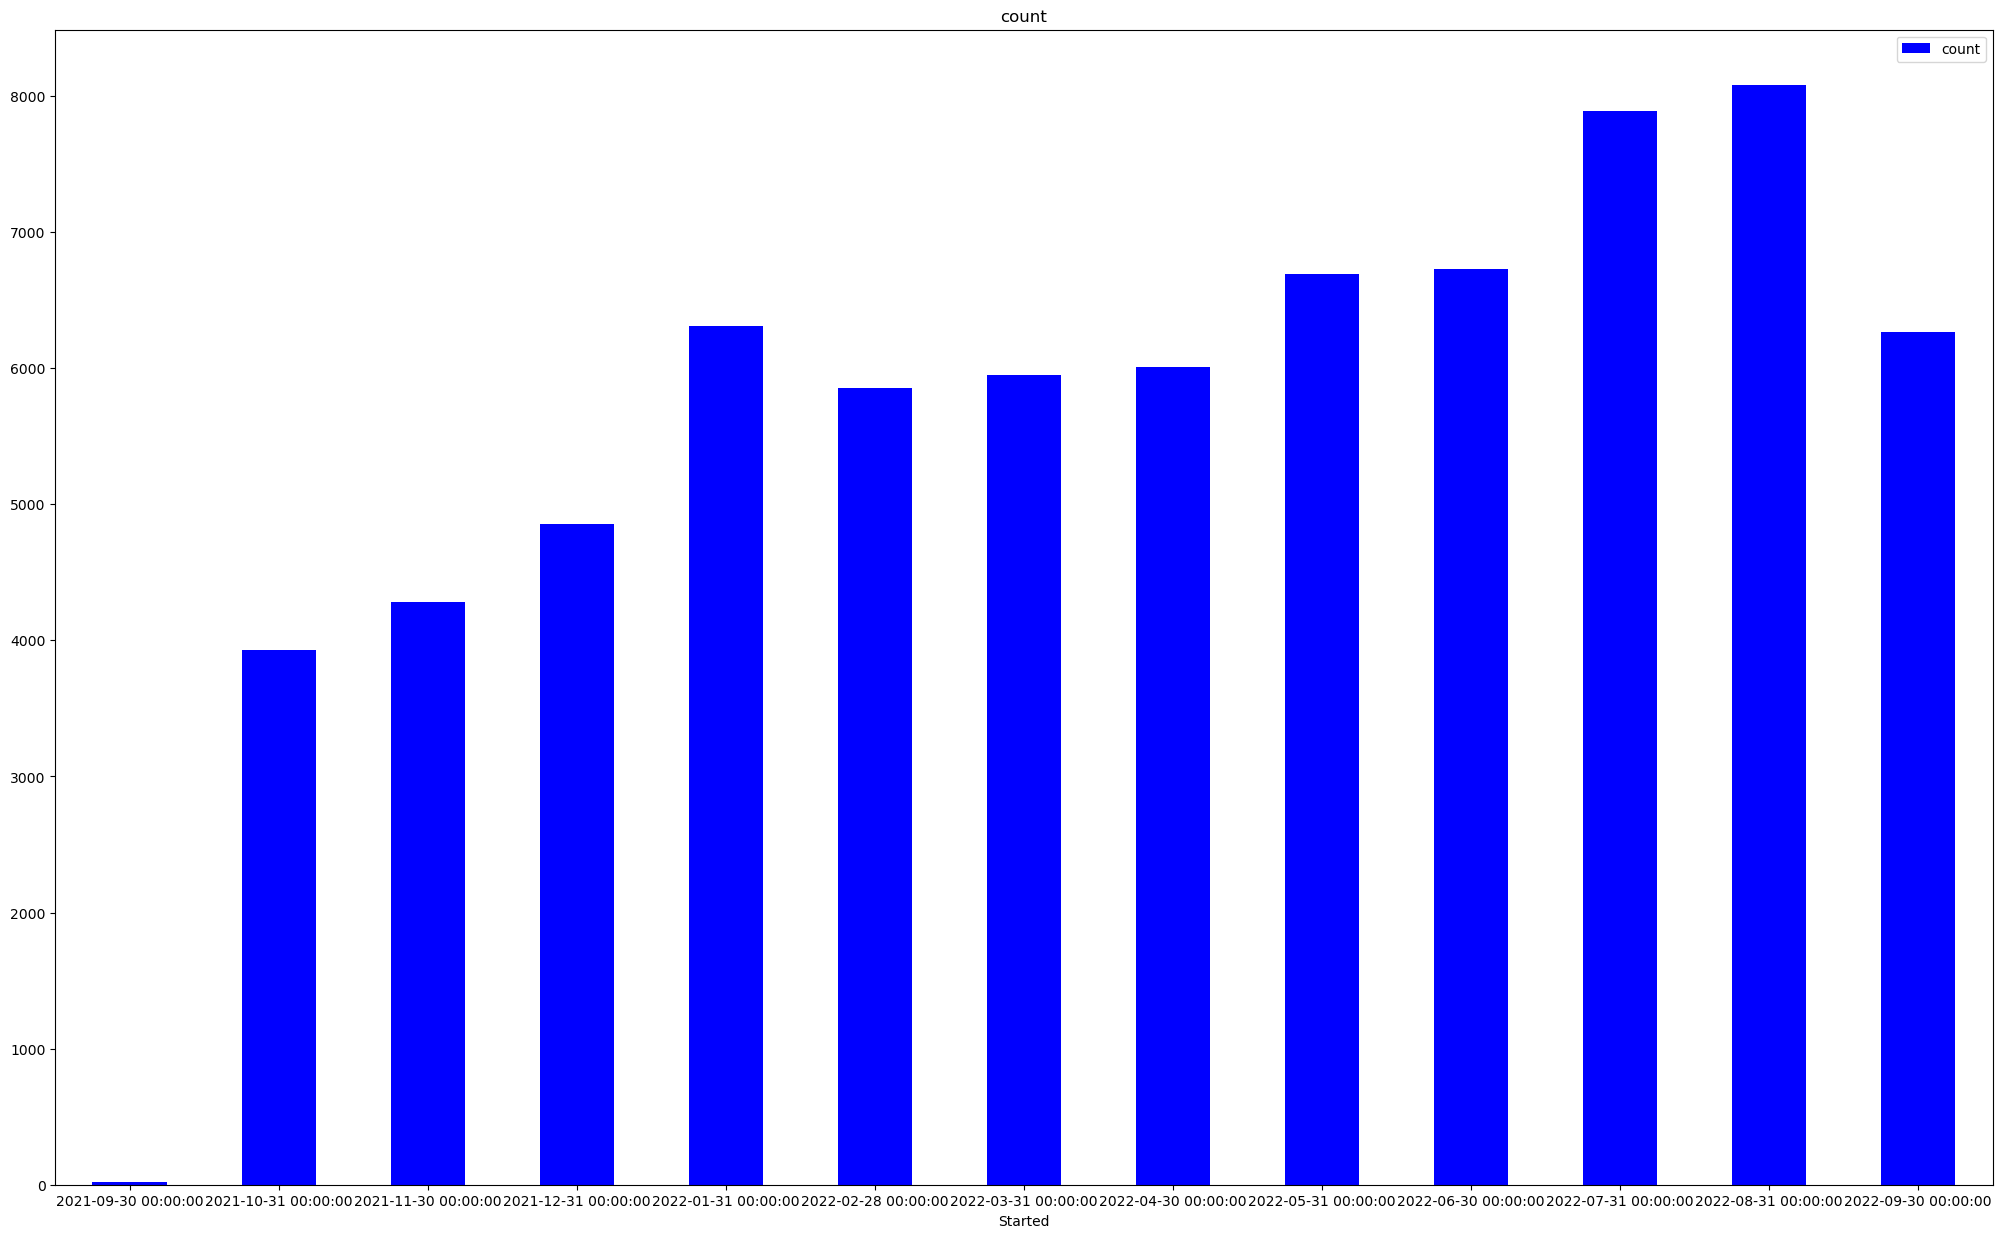

In [9]:
fig, axes = plt.subplots(1, 1, figsize = (25,15))
df_grouped_start_d.plot.bar(x='Started', y='count', color='b', title='count', ax=axes, rot=0)
plt.show()

In [ ]:
Mon_clust = pd.read_csv('res/preprocess/session_cluster/Monthly_clustered_2022_trans_data.csv')
print(Mon_clust.columns)
print(np.unique(Mon_clust['Clusters']))
clust0 = Mon_clust[Mon_clust['Clusters'] == 0].shape[0]
clust1 = Mon_clust[Mon_clust['Clusters'] == 1].shape[0]
clust2 = Mon_clust[Mon_clust['Clusters'] == 2].shape[0]
print(clust0)
print(clust1)
print(clust2)



Index(['level_0', 'Unnamed: 0', 'index', 'Start_day', 'Start_month',
       'Start_year', 'Start_DOY', 'Start_weekday', 'Start_time',
       'Energy_required', 'Connected_time', 'Charge_point', 'Start_time_slot',
       'Energy_required_slot', 'Connected_time_slot', 'Departure_time',
       'Clusters'],
      dtype='object')
[-1  0  1  2]
50985
590
301


In [22]:
Year_clust = pd.read_csv('res/preprocess/session_cluster/Final_session_clustered_2022_trans_data.csv')
print(Year_clust.columns)
print(np.unique(Year_clust['Final_clusters']))
clust0 = Mon_clust[Mon_clust['Final_clusters'] == 0].shape[0]
clust1 = Mon_clust[Mon_clust['Final_clusters'] == 1].shape[0]
clust2 = Mon_clust[Mon_clust['Final_clusters'] == 2].shape[0]
print(clust0)
print(clust1)
print(clust2)



Index(['level_0', 'Unnamed: 0', 'index', 'Start_day', 'Start_month',
       'Start_year', 'Start_DOY', 'Start_weekday', 'Start_time',
       'Energy_required', 'Connected_time', 'Charge_point', 'Start_time_slot',
       'Energy_required_slot', 'Connected_time_slot', 'Departure_time',
       'Clusters', 'Start_mean', 'Departure_mean', 'Final_clusters'],
      dtype='object')
[0.]
59753
0
0
